In [1]:

import getdist
from getdist import plots, MCSamples
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
%matplotlib inline


g = plots.getSubplotPlotter(width_inch=8)

In [6]:
ss_4b_lcdm = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'shrihan-des-y3-fidA.txt'
#ss_4b_lcdm = Path.home() / 'weaklens' / 'cosmolib' / 'output' / 'chain_2x2pt_lcdm_SR_maglim.txt'
chain_ss_4b_lcdm = np.genfromtxt(ss_4b_lcdm, names=True)

In [7]:
chain_ss_4b_lcdm['cosmological_parametersomega_m']

array([0.85581918, 0.81984427, 0.80039414, ..., 0.26030847, 0.19969432,
       0.35134273])

In [8]:
# fiducial_2x2_lcdm_4b = '/global/cfs/cdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2pt_lcdm_SR_maglim.txt'
# chain_fiducial_2x2_lcdm_4b = np.genfromtxt(fiducial_2x2_lcdm_4b, names=True)

Removed no burn in


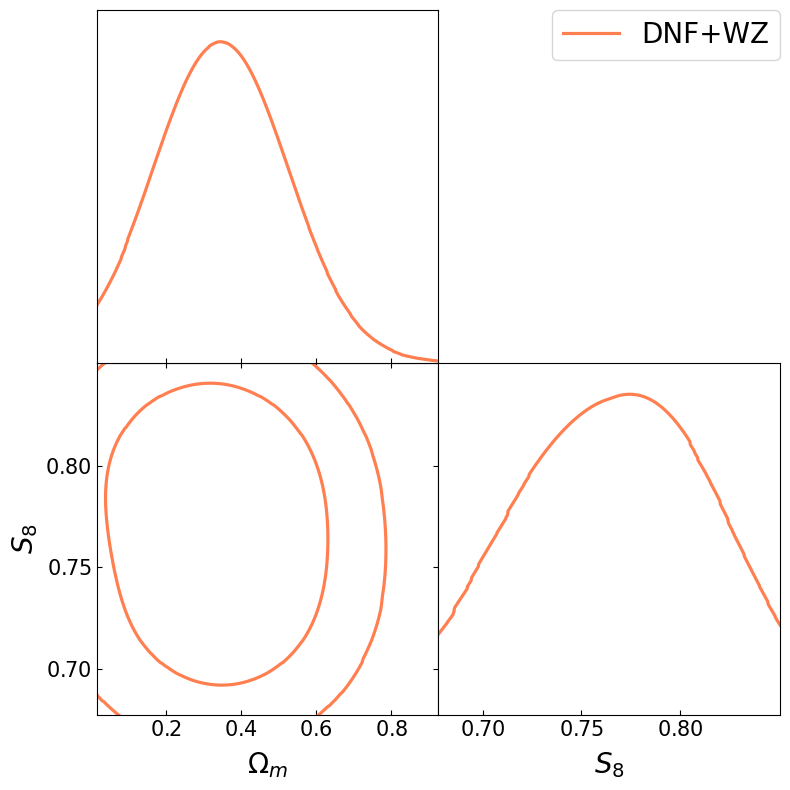

In [9]:
omm = 0.#,#0.03
oss = 0.#,#0.03
uu = chain_ss_4b_lcdm
ss_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                               (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
                                uu['cosmological_parametersn_s']],
                                weights=(uu['weight']), names = ['Om','sigma8','s8','ns'], labels = ['\Omega_{m}','\sigma8','S_8','ns'])

# uu = chain_fiducial_2x2_lcdm_4b
# fid_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m']+omm,uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                 (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3)+oss,
#                                  uu['cosmological_parametersn_s']],
#                                  weights=(uu['weight']), names = ['Om','sigma8','s8','ns'], labels = ['\Omega_{m}','\sigma8','S_8','ns'])


g.settings.axes_labelsize = 20
g.settings.axes_fontsize =15
g.settings.legend_fontsize = 20
g.settings.linewidth = 2

g.triangle_plot([ss_4b], ['Om','s8'], filled=[False,False,True, True], 
                colors=['coral','steelblue'], alphas=[1,1, 0.6], 
                legend_labels=['DNF+WZ','SOMPZ+WZ','fiducial LCDM','SOMPZ+WZ LCDM'],  legend_loc='upper right',fontsize=15, 
                contour_colors=['coral','steelblue'],
                ls = ['-','-','-','-'], contour_ls = ['-','-','-','-'])

In [7]:
g.add_text('LCDM 2x2pt 4 bins\nFiducial', fontsize = 20, y = 1.5)
# plt.draw()
# plt.show()
g.export('plot.pdf')



In [8]:
uu = chain_ss_4b_lcdm
ss_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
                                (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
                                 weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])

# uu = chain_fiducial_2x2_lcdm_4b
# fid_4b = MCSamples(samples=np.c_[uu['cosmological_parametersomega_m'],uu['COSMOLOGICAL_PARAMETERSSIGMA_8'],
#                                  (uu['COSMOLOGICAL_PARAMETERSSIGMA_8'])*np.sqrt((uu['cosmological_parametersomega_m'])/0.3),],
#                                   weights=(uu['weight']), names = ['Om','sigma8','s8'], labels = ['\Omega_{m}','\sigma8','S_8'])


Removed no burn in


In [10]:
ss_4b_params = ss_4b.getParams()
# fid_4b_params = fid_4b.getParams()

In [11]:
print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.Om),0.5*(ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.Om, 0.68)[0])))
#print  ("Omega_m: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.Om),0.5*(fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.Om, 0.68)[0])))


Omega_m: 0.320+-0.037


In [12]:
print  ("s8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.s8),0.5*(ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.s8, 0.68)[0])))
#print  ("s8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.s8),0.5*(fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.s8, 0.68)[0])))


s8: 0.778+-0.035


In [13]:
print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( ss_4b.mean(ss_4b_params.sigma8),0.5*(ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[1]-ss_4b.twoTailLimits(ss_4b_params.sigma8, 0.68)[0])))
#print  ("sigma8: {0:2.3f}+-{1:2.3f}".format( fid_4b.mean(fid_4b_params.sigma8),0.5*(fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[1]-fid_4b.twoTailLimits(fid_4b_params.sigma8, 0.68)[0])))


sigma8: 0.758+-0.069
